Hoy, vamos a comparar los resultados de aplicar el método de Euler, de Euler mejorado y de Runge-Kutta de cuarto orden para encontrar una solución aproximada de $y(1.5)$, donde $y(x)$ es la solución del problema de valores iniciales $y'=2xy$, $y(1)=1$. Utilice $h = 0.1$.

#**Método de Euler**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

In [ ]:
#Método de Euler
def Euler(f, x0, xn, y0, n):
  x = np.linspace(x0, xn, n+1)
  y = np.zeros(n+1)
  y[0] = y0
  #h = 0.1
  h = (xn - x0)/n  #tamaño de paso
  for i in range(1, n+1):
    y[i] = y[i-1] + h * f(x[i-1], y[i-1])
  return(x, y)

In [ ]:
def f(x, y):
  sol = 2.*x*y
  return(sol)

(x,y) = Euler(f, 1, 1.5, 1, 5)
#plt.plot(x,y)
x,y


(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 array([1.        , 1.2       , 1.464     , 1.81536   , 2.2873536 ,
        2.92781261]))

##**Método de Euler mejorado**

In [ ]:
def rk2(f, x0, xn, y0, n):
  x = np.linspace(x0, xn, n+1)
  y = np.zeros(n+1)
  #K1 = k2 = np.zeros(n+1)

  y[0] = y0
  h = (xn - x0)/n
  for i in range(1, n+1):
    k1 = f(x[i-1] , y[i-1])
    k2 = f(x[i-1] + h , y[i-1] + h*k1)
    y[i] = y[i-1] + h*(k1 + k2)/2.
  return (x,y)     

In [ ]:
def f(x, y):
  f1 = 2*x*y
  return (f1)

(x,y) = rk2(f, 1, 1.5, 1, 5)  # llamar rk2

x,y

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 array([1.        , 1.232     , 1.5478848 , 1.98315001, 2.59078717,
        3.45092851]))

#**Método de Runge-Kutta de cuarto orden (RK4)**
Existen métodos de Runge-Kutta de diferentes órdenes. Por ejemplo, el método de Euler básico es conocido como un Runge-Kutta de primer orden, mientras que el algoritmo de Euler mejorado es equivalente al método de Runge-Kutta de segundo orden (RK2). Aunque el método de Runge-Kutta de cuarto orden es uno de los métodos más populares, la deducción es similar al RK2 pero mucho mas larga y la vamos a omitir en este caso, (ver deducción en [2]). En general, considere un sistema como el siguiente

$$y' = f(t,y), \,\,\,\,\,\,\,\, y(t_0)=y_0$$

El método iterativo RK4 usa las siguientes expresiones para resolver este sistema

$$ 
\begin{align}
 k_1 =&\, f\,(t,y)&\rightarrow& &k_1 =&\, f\,(t_n,y_n)\\
 k_2 =&\, f\left( t + \frac{h}{2}\,\,\,,\,\,\,y + \frac{1}{2}hk_1\right)&\rightarrow& &k_2 =&\, f\left( t_n + \frac{h}{2}\,\,\,,\,\,\,y_n + \frac{1}{2}hk_1\right)\\
 k_3 =&\, f\left( t + \frac{h}{2}\,\,\,,\,\,\,y + \frac{1}{2}hk_2\right)&\rightarrow& &k_3 =&\, f\left( t_n + \frac{h}{2}\,\,\,,\,\,\,y_n + \frac{1}{2}hk_2\right)\\
 k_4 =&\, f\left( t + h\,\,\,,\,\,\,y + hk_3\right)&\rightarrow& &k_4 =&\, f\left( t_n + h\,\,\,,\,\,\,y_n + hk_3\right)\\\\\\
 y(t+h) =\,& y(t) + \frac{h}{6}( k_1 + 2k_2 + 2k_3 + k_4  )&\rightarrow& &y_{n+1} =\,& y_n + \frac{h}{6}( k_1 + 2k_2 + 2k_3 + k_4  )
 \end{align}
$$


In [ ]:
def rk4(f, x0, xn, y0, n):
  x = np.linspace(x0, xn, n+1)
  y = np.zeros(n+1)
  #K1 = k2 = k3 = k4 = np.zeros(n+1)

  y[0] = y0
  h = (xn - x0)/n
  for i in range(1, n+1):
    k1 = f(x[i-1] , y[i-1])
    k2 = f(x[i-1] + h/2. , y[i-1] + h*k1/2.)
    k3 = f(x[i-1] + h/2. , y[i-1] + h*k2/2.)
    k4 = f(x[i-1] + h, y[i-1] + h*k3)
    y[i] = y[i-1] + (k1 + 2.*(k2 + k3) + k4)*h/6.
  return (x,y) 

In [ ]:
def f(x, y):
  f1 = 2*x*y
  return (f1)

(x,y) = rk4(f, 1, 1.5, 1, 5) 

x,y

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 array([1.        , 1.23367435, 1.5526954 , 1.99368677, 2.61163323,
        3.49021064]))

#**Runge-Kutta de cuardo orden (RK4)**
En esta sesión vamos a resolver un sistema que contiene varias ecuaciones diferenciales (ODE)
##**Ejercicio 1: Oscilador amortiguado**
Un objeto de 10.6 kg oscila en el extremo de un resorte vertical que tiene una constante de resorte de 2.05 $\times$ 10$^4$ N/m.
El efecto de la resistencia del aire se representa mediante el
coeficiente de amortiguamiento b = 3.00 N s/m. 
Grafique $x(t)$ en función del tiempo, resolviendo mediante el método RK4.✅


Inicialmente, debemos bajar el orden de la ecuación que describe el comportamiento del sistema, \\
$$\frac{d^2x}{dt^2}=-\frac{b}{m}\frac{dx}{dt} -\frac{k}{m}x$$

Posteriormente, vamos a crear un vector $(x,v)$ representado por el array $(u[0],u[1])$ y la función $\mathbf{f}=(f_1,f_2)$:


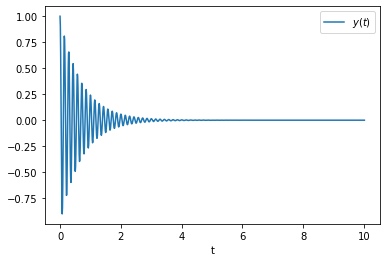

In [ ]:
# Usar Runge Kutta 4 (rk4) 
from numpy import *
import matplotlib.pyplot as plt

k = 20500
b = 30
m = 10.6 

t = 0 
x0 = 1
v0 =  0.0 
u = np.array([x0, v0])

def f(t, u):         
    f1 = u[1] 
    f2 = -(b/m)*u[1] - (k/m)*u[0]
    return np.array([f1, f2])

tsol = [t]
xsol = [u[0]]
vsol = [u[1]]
h = 0.01
tfin = 10

while t < tfin:
  k1 = f(t,u)
  k2 = f(t + h/2 , u + h*k1/2)
  k3 = f(t + h/2 , u + h*k2/2)
  k4 = f(t + h, u + h*k3)
  u = u + (k1 + 2*(k2 + k3) + k4)*h/6
  t = t + h
  xsol.append(u[0])
  vsol.append(u[1])
  tsol.append(t)
    
plt.plot(tsol,xsol)
#plt.plot(time, Y[1])
plt.legend( ["$y(t)$", "$v(t)$"], numpoints=1)
plt.xlabel('t')
plt.show()


[1] Pang, T. (1999). An introduction to computational physics.

[2] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.

[3] Zill, D. G., Hernández, A. E. G., & López, E. F. (2002). Ecuaciones diferenciales con aplicaciones de modelado (No. 970-686-487-3.). México: Thomson Learning.
